# Doodling with Different Packages

## Seaborn

### Trying multifacet graphs

In [2]:
# THE ONLINE TUTORIAL FROM SEABORN WEBSITE
# https://seaborn.pydata.org/examples/many_facets.html
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

In [4]:
df.head(10)

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
5,0,0,1
6,1,1,1
7,1,2,1
8,2,3,1
9,1,4,1


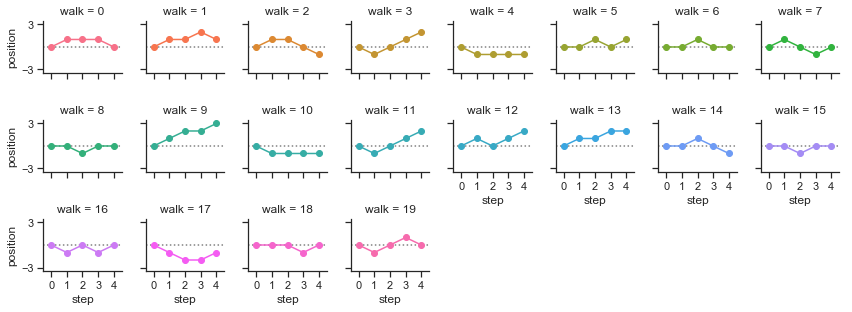

In [17]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=8, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

plt.show()

## Matplotlib

### Change histogram color

In [21]:
# THE ONLINE TUTORIAL FROM MATPLOTLIB WEBSITE
# https://matplotlib.org/gallery/statistics/hist.html
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

(array([4.0000e+00, 1.3000e+01, 5.8000e+01, 2.2000e+02, 6.6000e+02,
        1.8830e+03, 4.2610e+03, 7.9590e+03, 1.2262e+04, 1.5980e+04,
        1.7096e+04, 1.5211e+04, 1.1419e+04, 7.0210e+03, 3.5680e+03,
        1.6550e+03, 5.4600e+02, 1.4000e+02, 3.4000e+01, 1.0000e+01]),
 array([0.14458628, 0.61194641, 1.07930653, 1.54666666, 2.01402679,
        2.48138692, 2.94874705, 3.41610718, 3.88346731, 4.35082744,
        4.81818757, 5.2855477 , 5.75290783, 6.22026795, 6.68762808,
        7.15498821, 7.62234834, 8.08970847, 8.5570686 , 9.02442873,
        9.49178886]),
 <a list of 20 Patch objects>)

In [32]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

/Users/s.n.zhou/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


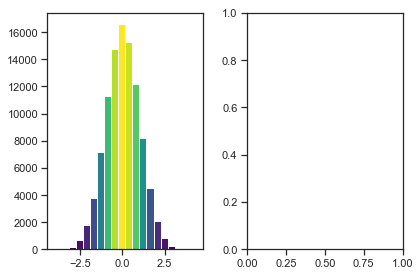

In [27]:
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

fig